# Examining small mammal diversity across NEON sites in the continental US




In [1]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
usa48 = Basemap(projection='merc',resolution = 'h', llcrnrlat=16.48,urcrnrlat=49.74,llcrnrlon=-127.28,urcrnrlon=-60.76, area_thresh = 10)

In [4]:
import pandas as pd

#Import the dataset 
# Remember to change to path to forward slashes or else won't read in 
neonmam = pd.read_csv("C:/Users/rpatankar/Documents/Rajit DS stuff/Data Science/Data Science Projects/NEON small mammals/NEONsmammaldiversity.csv")
neonmam.columns.str.strip()
#neonmam.columns.str.lower()
print(neonmam.columns)

Index([u'Domain', u'Site', u'Type', u'Lat ', u'Long', u'SpeciesDiversity'], dtype='object')


In [5]:
print(neonmam)

    Domain  Site   Type       Lat         Long  SpeciesDiversity
0        1  BART  reloc  44.063869  -71.287375                11
1        1  HARV   core  42.536911  -72.172650                12
2        2  SCBI   core  38.892925  -78.139494                 6
3        2  SERC  reloc  38.890131  -76.560014                 4
4        3  DSNY  reloc  28.125050  -81.436190                 3
5        3  JERC  reloc  31.194839  -84.468623                 7
6        3  OSBS   core  29.689282  -81.993431                 6
7        5  UNDE   core  46.233910  -89.537254                14
8        7  ORNL   core  35.964128  -84.282588                 6
9        8  TALL   core  32.950470  -87.393259                 8
10       9  WOOD   core  47.128200  -99.241334                11
11      10  CEPR   core  40.815530 -104.745600                13
12      10  STER  reloc  40.461894 -103.029290                11
13      11  OAES  reloc  35.410599  -99.058779                 9
14      15  ONAQ   core  

In [6]:
# Convert from Series objects to List objects.
longitudes = neonmam["Long"].tolist()
latitudes = neonmam["Lat "].tolist()
diversity = neonmam["SpeciesDiversity"].tolist()

#print(diversity[4:6])
new_div = [float(i) for i in diversity]
print(new_div)

[11.0, 12.0, 6.0, 4.0, 3.0, 7.0, 6.0, 14.0, 6.0, 8.0, 11.0, 13.0, 11.0, 9.0, 12.0]


In [7]:
# print(neonmam["Lat "])
# "Lat " has a trailing whitespace, hence causing some errors intially 

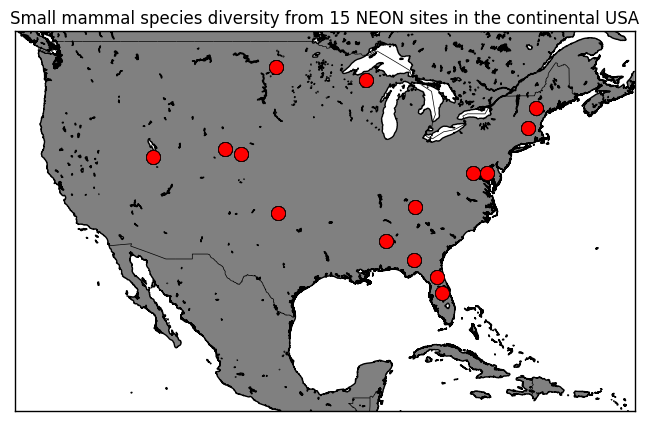

In [8]:
usa48 = Basemap(projection='merc',resolution = 'h', llcrnrlat=16.48,urcrnrlat=49.74,llcrnrlon=-127.28,urcrnrlon=-60.76, area_thresh = 10)
usa48.drawcoastlines()
usa48.drawcountries()
usa48.fillcontinents(color='grey')
usa48.drawmapboundary()

def get_marker_size(new_div):
    if new_div <= 5:
        return ('go')
    elif new_div > 5 and new_div <= 10:
        return ('yo')
    else:
        return ('ro')


# try the multiplication here with min marker size ---
min_marker_size = 1.5

for lon, lat,  in zip(longitudes, latitudes):
    x, y = usa48(longitudes, latitudes)
    #msize = div
    marker_string = get_marker_size(new_div)
    usa48.plot(x, y, marker_string, markersize=10)
plt.title("Small mammal species diversity from 15 NEON sites in the continental USA")
plt.show()

having issues with the plt function accepting species diversity for marker size and colour. Will attempt with scatter function in matplotlib. 

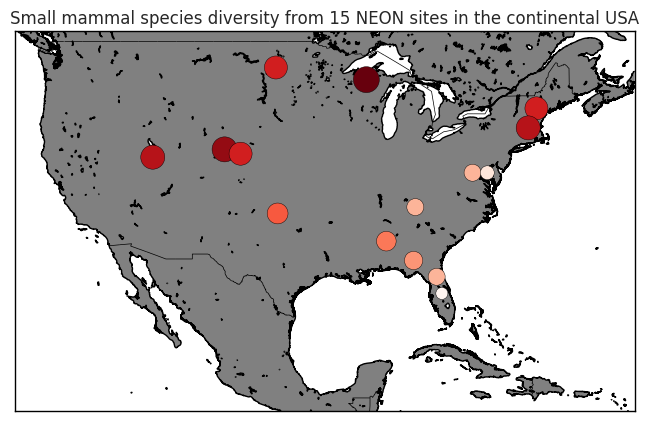

In [32]:
usa48 = Basemap(projection='merc',resolution = 'h', llcrnrlat=16.48,urcrnrlat=49.74,llcrnrlon=-127.28,urcrnrlon=-60.76, area_thresh = 10)
usa48.drawcoastlines()
usa48.drawcountries()
usa48.fillcontinents(color='grey')
usa48.drawmapboundary()


# using color maps in scatter plot to show a heat map of small mammal species diversity from NEON sites

# Will attempt to bin the data into categories in order to better display the variance in species diversity. 
x, y = usa48(longitudes, latitudes)
usa48.scatter(x, y, s=np.array(diversity)*25, marker="o", zorder=10, c=diversity, cmap=plt.cm.Reds)
plt.title("Small mammal species diversity from 15 NEON sites in the continental USA")
plt.show()

Interestingly enough, NEON sites that are higher in latitude appear to have higher species diversity. 

### Small mammal species diversity and habitat associations
Now, let's look more closely at the data to see if there are any clear patterns between species richness, abundances and habitat/landscape features.

First we will combine all available datasets, and do some cleaning before moving onto some summary statistics, correlations etc.

In [10]:
data_files = ["NEON.D01.BART.mam.csv", "NEON.D01.HARV.mam.csv", "NEON.D02.SCBI.mam.csv", "NEON.D02.SERC.mam.csv", "NEON.D03.DSNY.mam.csv", "NEON.D03.JERC.mam.csv", "NEON.D03.OSBS.mam.csv", "NEON.D05.UNDE.mam.csv", "NEON.D07.ORNL.mam.csv", "NEON.D08.TALL.mam.csv", "NEON.D09.WOOD.mam.csv", "NEON.D10.CPER.mam.csv", "NEON.D10.STER.mam.csv", "NEON.D11.OAES.mam.csv", "NEON.D15.ONAQ.mam.csv"]
print(data_files)

['NEON.D01.BART.mam.csv', 'NEON.D01.HARV.mam.csv', 'NEON.D02.SCBI.mam.csv', 'NEON.D02.SERC.mam.csv', 'NEON.D03.DSNY.mam.csv', 'NEON.D03.JERC.mam.csv', 'NEON.D03.OSBS.mam.csv', 'NEON.D05.UNDE.mam.csv', 'NEON.D07.ORNL.mam.csv', 'NEON.D08.TALL.mam.csv', 'NEON.D09.WOOD.mam.csv', 'NEON.D10.CPER.mam.csv', 'NEON.D10.STER.mam.csv', 'NEON.D11.OAES.mam.csv', 'NEON.D15.ONAQ.mam.csv']


In [11]:
import pandas as pd
d11mam = pd.read_csv("C:/Users/rpatankar/Documents/Rajit DS stuff/Data Science/Data Science Projects/NEON small mammals/NEON.D11.OAES.mam1.csv")

In [12]:
print(d11mam.head(10))
print(d11mam.shape)

                                uid domainID siteID    plotID trapCoordinate  \
0  A1AF35C05AC84A64B1EF6D20049F422E      D11   OAES  OAES_007            I10   
1  12ADDDE4E34D4D61BE8A15727672DF03      D11   OAES  OAES_007             E6   
2  9BB4A0DF0CC44BEAAC0E404F76496BA1      D11   OAES  OAES_004             A7   
3  BDFE388DC1E7407B814074EF88C5CAB6      D11   OAES  OAES_007             A3   
4  97BCB54CAE7648968EA71BBE3107D899      D11   OAES  OAES_007             A6   
5  C8EAD35368384A01B91938A65A25D7F0      D11   OAES  OAES_007             J7   
6  A48726787AF642DE8B7F44486778C9ED      D11   OAES  OAES_007             C9   
7  F6BF38F8D5E14B578F3AAD49CAA88E5F      D11   OAES  OAES_007             D1   
8  7F5569F0CC194CD08796DA25D715E1BF      D11   OAES  OAES_007            E10   
9  B05D292582EB4CC6AF4A603287027D8D      D11   OAES  OAES_004             H6   

             nlcdClass       date         individualID taxonID  \
0           shrubScrub  5/19/2015  NEON.MAM.D11.0L120

### Interesting things to look for from individual datasets

Using the Southern Plains small mammal data set (2015 sampling data from a grassland site in Oklahoma) as an example, one can explore some questions about the ecology of mammals here. For example, is there significant dimorphism (differences) between captured males and females with respect to body weights, lengths etc.?

Having fun with seaborn plots to examine differences between males and females: 

swarmplots reveal the individual data points, which can be useful to assess the counts. For example, several of the species on right hand side of the plot only have 1-5 captured individuals. 

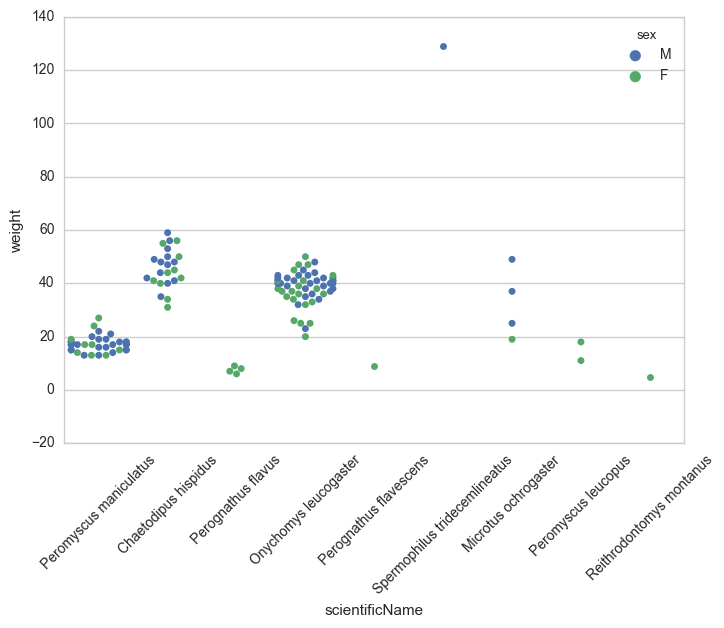

In [30]:
import seaborn as sns
g = sns.swarmplot(x="scientificName", y="weight", hue="sex", data=d11mam)
for item in g.get_xticklabels():
    item.set_rotation(45)

Box plots show the spread across the data range for each species:

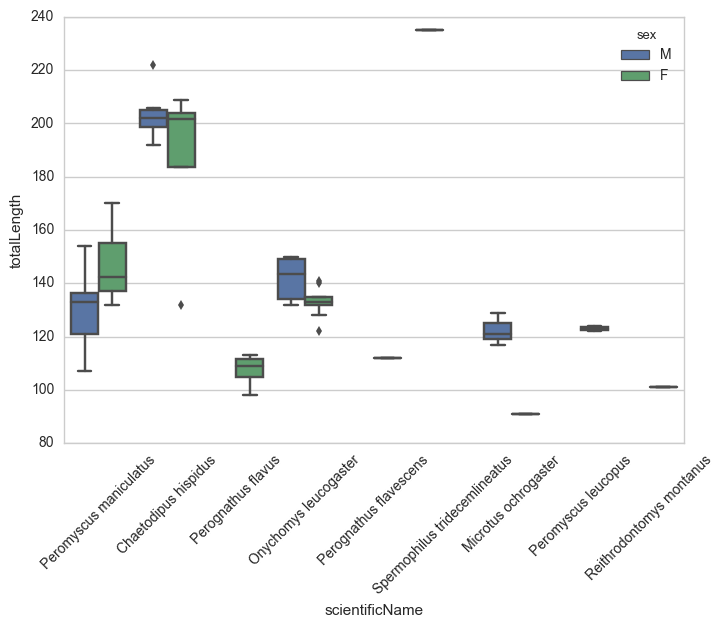

In [27]:
g = sns.boxplot(x = "scientificName", hue="sex", y="totalLength", data=d11mam)


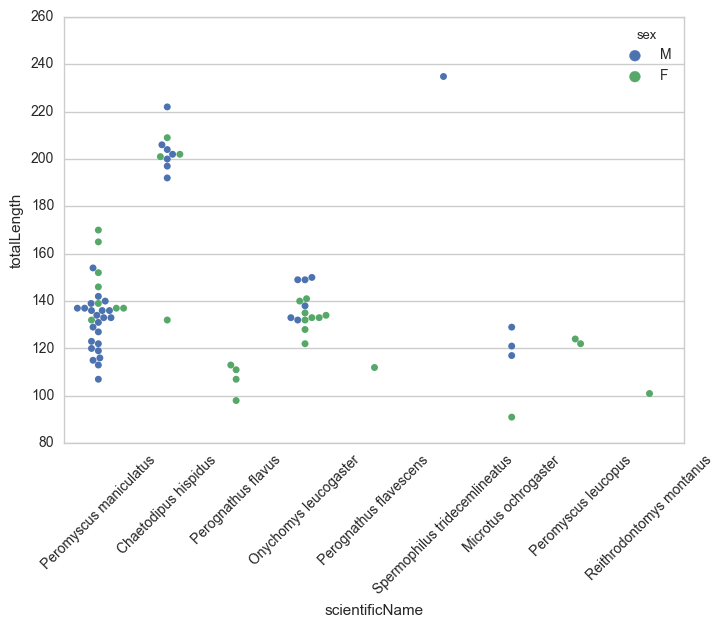

In [28]:
g = sns.swarmplot(x = "scientificName", hue="sex", y="totalLength", data=d11mam)
for item in g.get_xticklabels():
    item.set_rotation(45)

Total body length doesn't appear to be significantly different between the sexes among the species 